In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\manee\OneDrive\Desktop\Mentorness\Brainwave Matrix Solutions\Task - 1\Superstore.csv", encoding='latin1')
data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Convert date columns to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

C:\Users\manee\AppData\Local\Temp\ipykernel_18272\638082022.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Order Date'] = pd.to_datetime(data['Order Date'])
C:\Users\manee\AppData\Local\Temp\ipykernel_18272\638082022.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Ship Date'] = pd.to_datetime(data['Ship Date'])


In [4]:
# Add new columns for analysis
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month_name()
data['Weekday'] = data['Order Date'].dt.day_name()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Year
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896,2012.722934
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108,1.124039
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,2011.000000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,2012.000000
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500,2013.000000
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000,2014.000000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,2014.000000


In [7]:
data.duplicated().sum()

0

# Exploratory Data Analysis

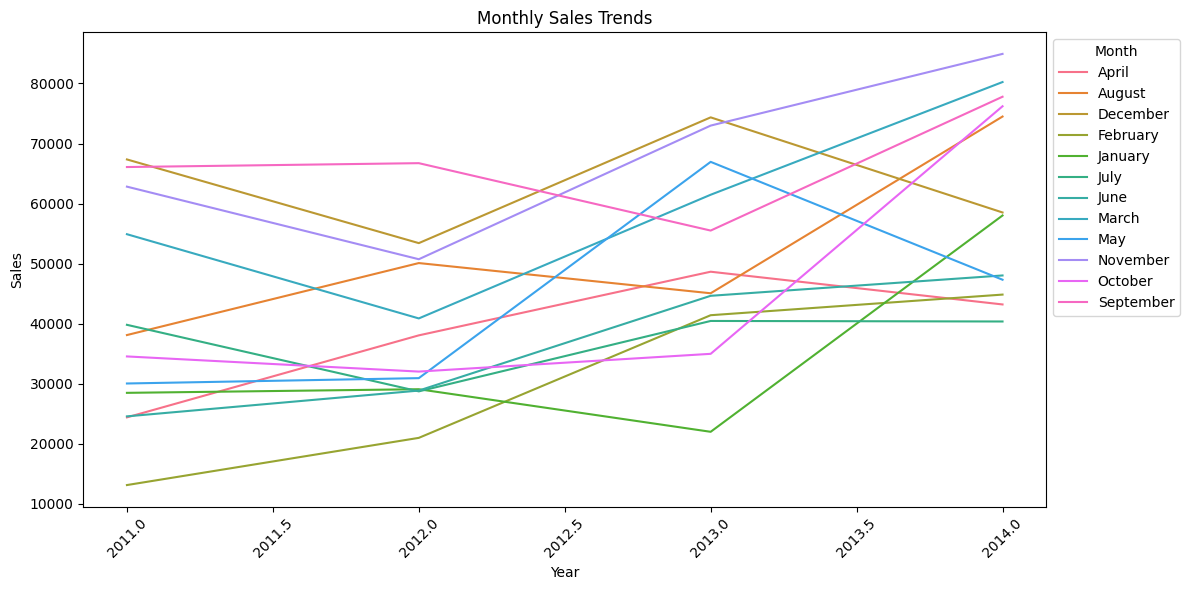

In [8]:
# Sales trends over time
def sales_trends():
    sales_by_month = data.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=sales_by_month, x='Year', y='Sales', hue='Month')
    plt.title('Monthly Sales Trends')
    plt.ylabel('Sales')
    plt.xlabel('Year')
    plt.xticks(rotation=45)
    plt.legend(title='Month', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

sales_trends()

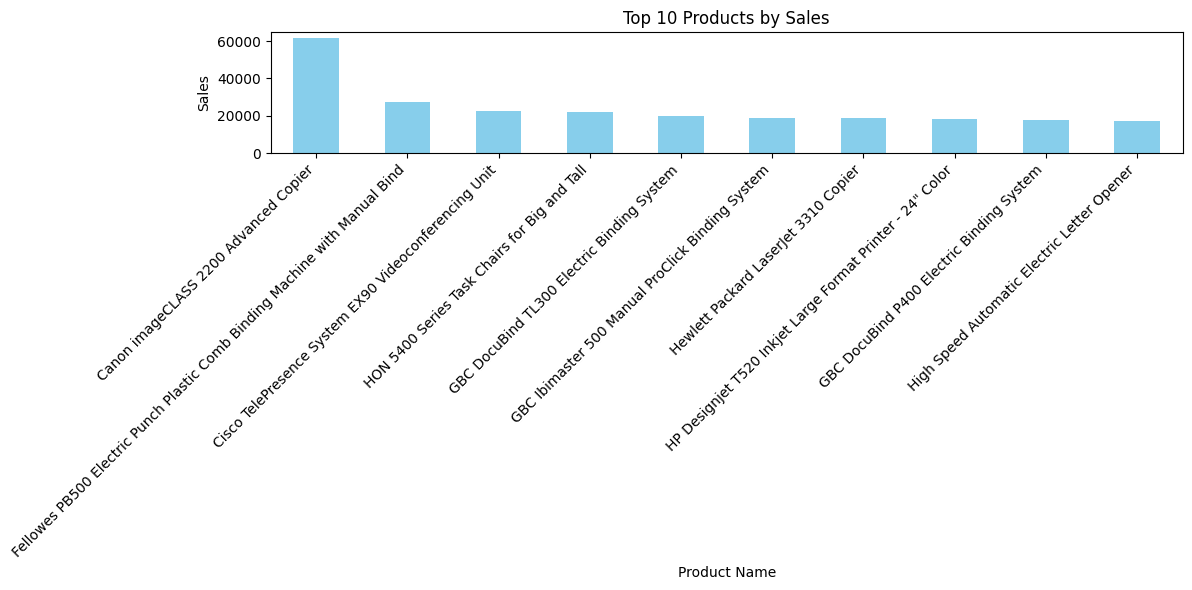

In [9]:
# Top-performing products
def top_products():
    top_products = data.groupby('Product Name')['Sales'].sum().nlargest(10)
    plt.figure(figsize=(12, 6))
    top_products.plot(kind='bar', color='skyblue')
    plt.title('Top 10 Products by Sales')
    plt.ylabel('Sales')
    plt.xlabel('Product Name')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

top_products()

C:\Users\manee\AppData\Local\Temp\ipykernel_18272\4036680833.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_region, x='Region', y='Sales', palette='viridis')


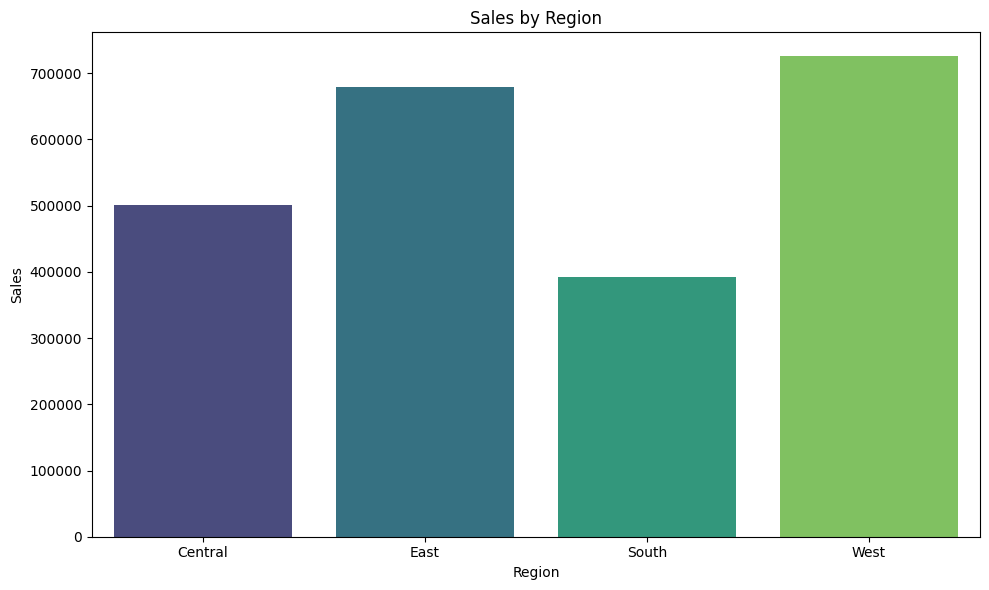

In [10]:
# Regional analysis
def regional_analysis():
    sales_by_region = data.groupby('Region')['Sales'].sum().reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(data=sales_by_region, x='Region', y='Sales', palette='viridis')
    plt.title('Sales by Region')
    plt.ylabel('Sales')
    plt.xlabel('Region')
    plt.tight_layout()
    plt.show()

regional_analysis()

A significant number of customers belong to the Western region while the Southern region has the least number of customers.

C:\Users\manee\AppData\Local\Temp\ipykernel_18272\4036680833.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_region, x='Region', y='Sales', palette='viridis')


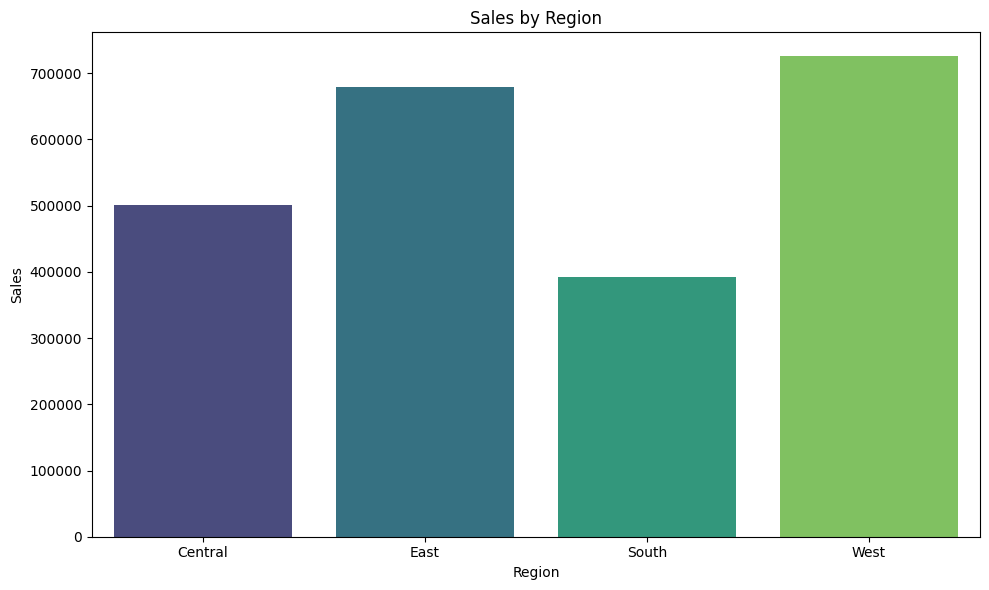

In [11]:
# Discount vs Profit Analysis
def discount_vs_profit():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='Discount', y='Profit', alpha=0.6)
    plt.title('Discount vs Profit ')
    plt.ylabel('Profit')
    plt.xlabel('Discount')
    plt.axhline(0, color='red', linestyle='--')
    plt.tight_layout()
    plt.show()

regional_analysis()

C:\Users\manee\AppData\Local\Temp\ipykernel_18272\133206739.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_category, x='Category', y='Sales', palette='coolwarm')


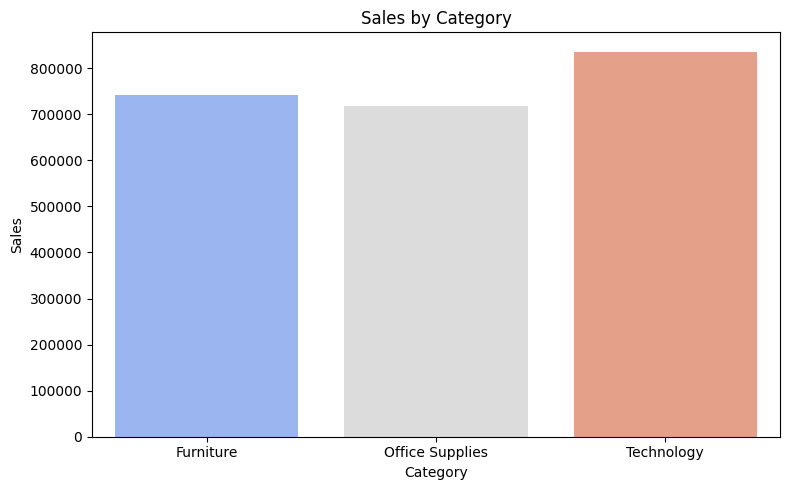

In [13]:
# Category-wise sales analysis
def category_sales():
    sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()
    plt.figure(figsize=(8, 5))
    sns.barplot(data=sales_by_category, x='Category', y='Sales', palette='coolwarm')
    plt.title('Sales by Category')
    plt.ylabel('Sales')
    plt.xlabel('Category')
    plt.tight_layout()
    plt.show()

category_sales()

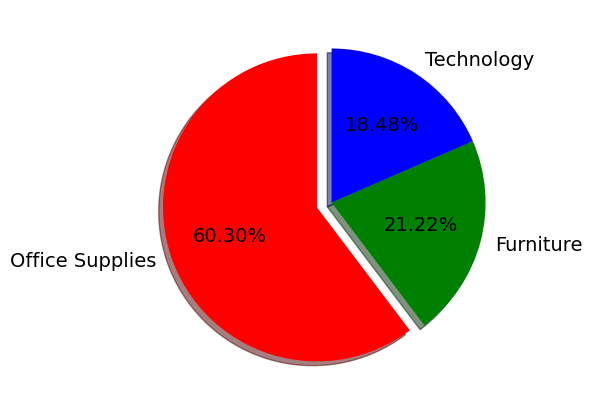

In [14]:
plt.figure(figsize=(10,5))
labels = data['Category'].value_counts().keys()
values = data['Category'].value_counts().values

plt.pie(values,labels=labels,autopct='%1.2f%%',shadow=True,explode=[0.1,0,0],startangle=90,textprops={'fontsize': 14},colors=['red','green','blue'])
plt.show()

C:\Users\manee\AppData\Local\Temp\ipykernel_18272\3224350919.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_subcategory, x='Sub-Category', y='Sales', palette='viridis')


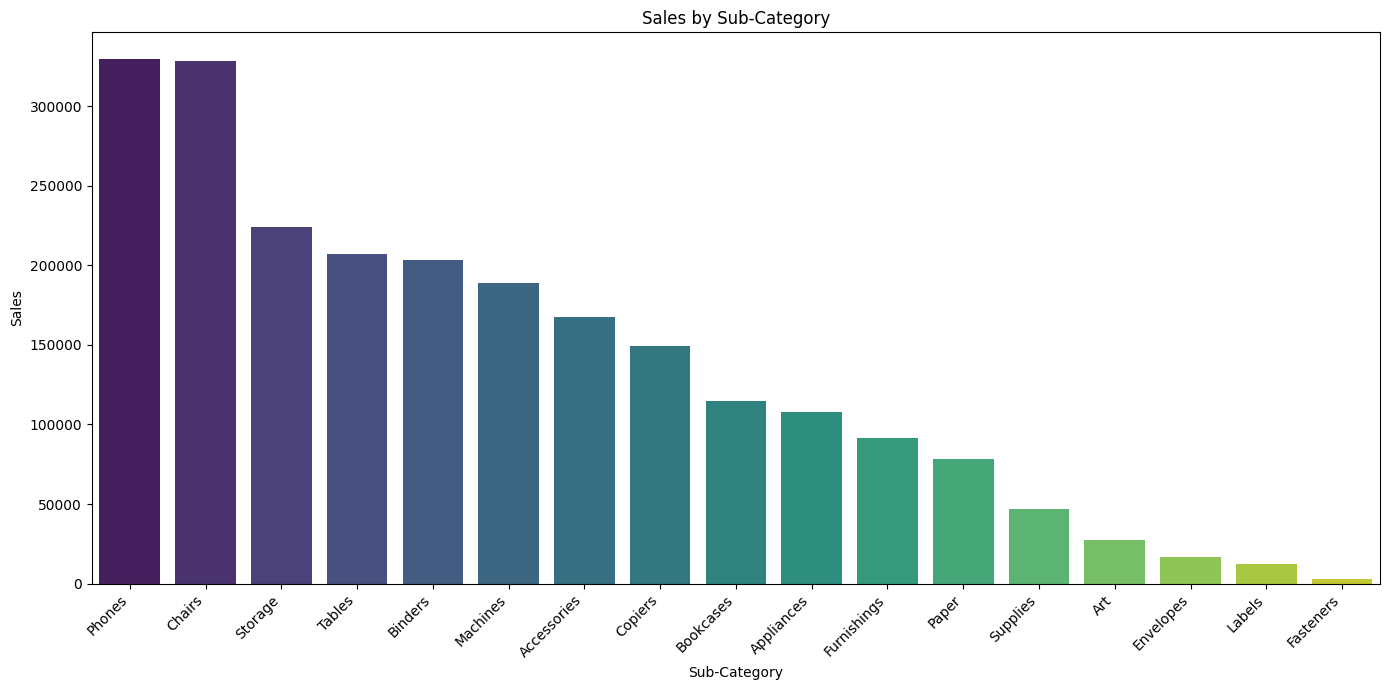

In [15]:
# Sub-category analysis
def subcategory_sales():
    sales_by_subcategory = data.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).reset_index()
    plt.figure(figsize=(14, 7))
    sns.barplot(data=sales_by_subcategory, x='Sub-Category', y='Sales', palette='viridis')
    plt.title('Sales by Sub-Category')
    plt.ylabel('Sales')
    plt.xlabel('Sub-Category')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

subcategory_sales()

Skewness of Row ID: 0.0
Kurtosis of Row ID: -1.2000000000000002


C:\Users\manee\AppData\Local\Temp\ipykernel_18272\3503813164.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)
C:\Users\manee\AppData\Local\Temp\ipykernel_18272\3503813164.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
C:\Users\manee\AppData\Local\Temp\ipykernel_18272\3503813164.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,2)


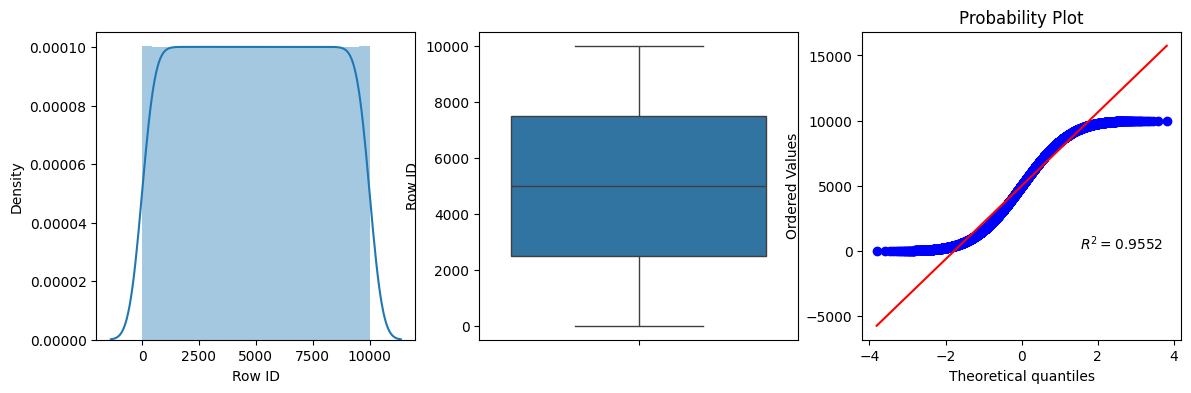

Skewness of Postal Code: -0.12852551641989202
Kurtosis of Postal Code: -1.493020228144796


C:\Users\manee\AppData\Local\Temp\ipykernel_18272\3503813164.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)
C:\Users\manee\AppData\Local\Temp\ipykernel_18272\3503813164.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
C:\Users\manee\AppData\Local\Temp\ipykernel_18272\3503813164.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,2)


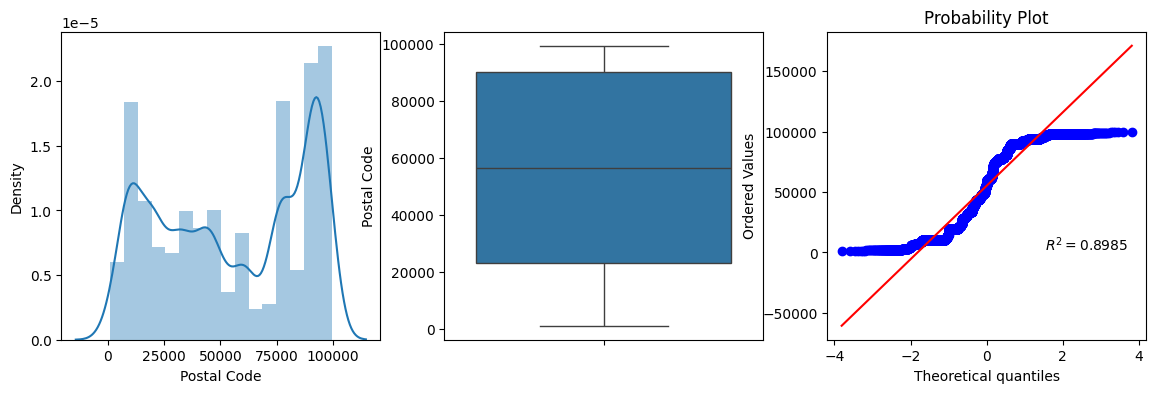

Skewness of Sales: 12.97275234181623
Kurtosis of Sales: 305.311753246823


C:\Users\manee\AppData\Local\Temp\ipykernel_18272\3503813164.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)
C:\Users\manee\AppData\Local\Temp\ipykernel_18272\3503813164.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
C:\Users\manee\AppData\Local\Temp\ipykernel_18272\3503813164.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,2)


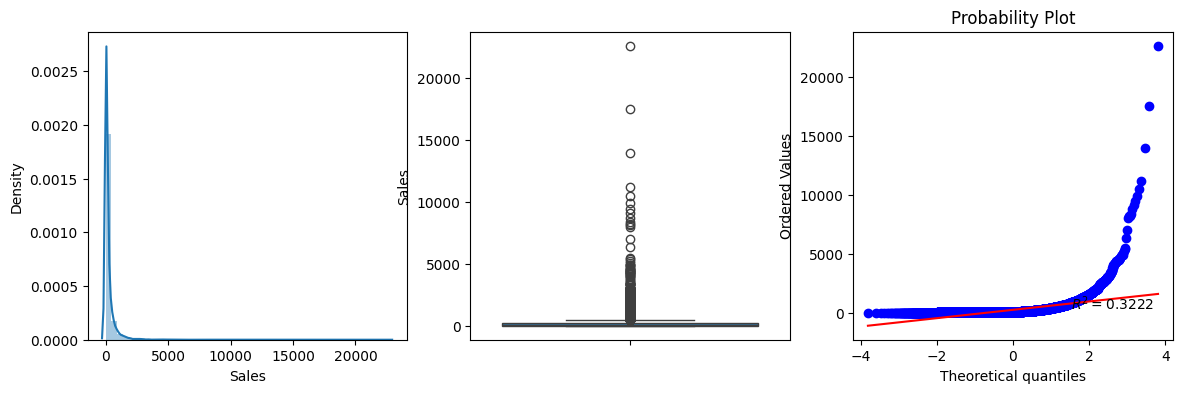

Skewness of Quantity: 1.2785447527223421
Kurtosis of Quantity: 1.9918893664821322


C:\Users\manee\AppData\Local\Temp\ipykernel_18272\3503813164.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)
C:\Users\manee\AppData\Local\Temp\ipykernel_18272\3503813164.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
C:\Users\manee\AppData\Local\Temp\ipykernel_18272\3503813164.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,2)


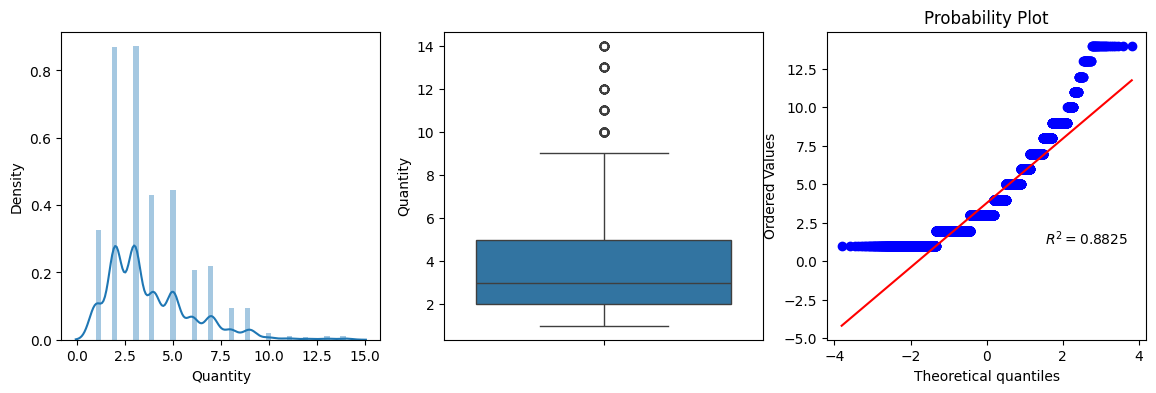

Skewness of Discount: 1.6842947474238648
Kurtosis of Discount: 2.4095461225966774


C:\Users\manee\AppData\Local\Temp\ipykernel_18272\3503813164.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)
C:\Users\manee\AppData\Local\Temp\ipykernel_18272\3503813164.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
C:\Users\manee\AppData\Local\Temp\ipykernel_18272\3503813164.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,2)


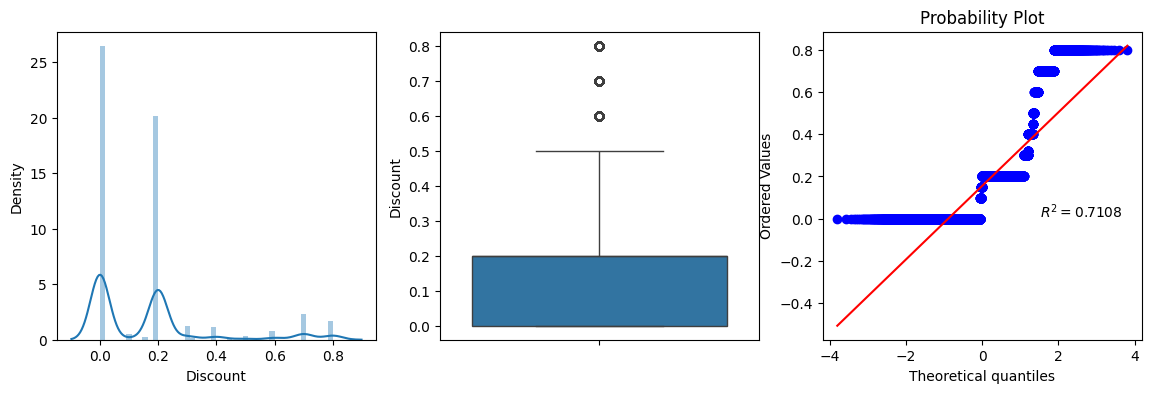

Skewness of Profit: 7.561431562468343
Kurtosis of Profit: 397.1885145524141


C:\Users\manee\AppData\Local\Temp\ipykernel_18272\3503813164.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)
C:\Users\manee\AppData\Local\Temp\ipykernel_18272\3503813164.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
C:\Users\manee\AppData\Local\Temp\ipykernel_18272\3503813164.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,2)


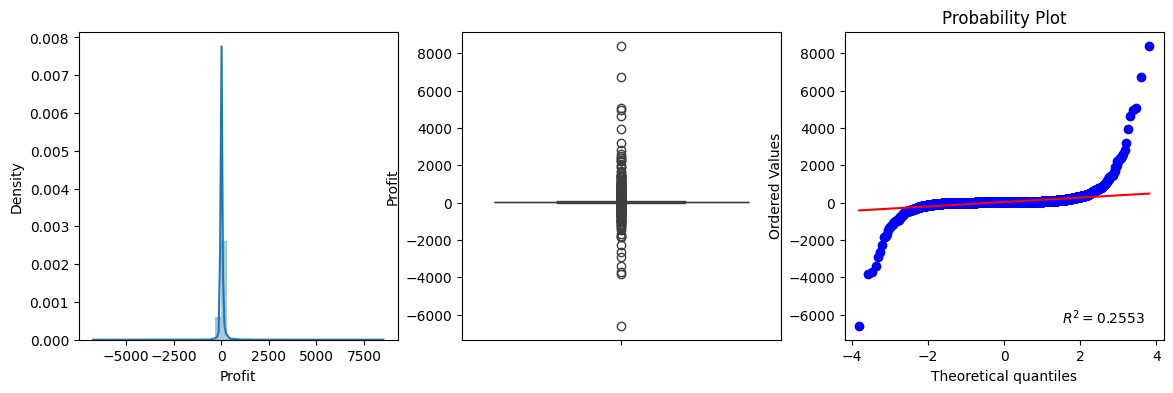

Skewness of Year: -0.2833086548087625
Kurtosis of Year: -1.3086112152185956


C:\Users\manee\AppData\Local\Temp\ipykernel_18272\3503813164.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)
C:\Users\manee\AppData\Local\Temp\ipykernel_18272\3503813164.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
C:\Users\manee\AppData\Local\Temp\ipykernel_18272\3503813164.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,2)


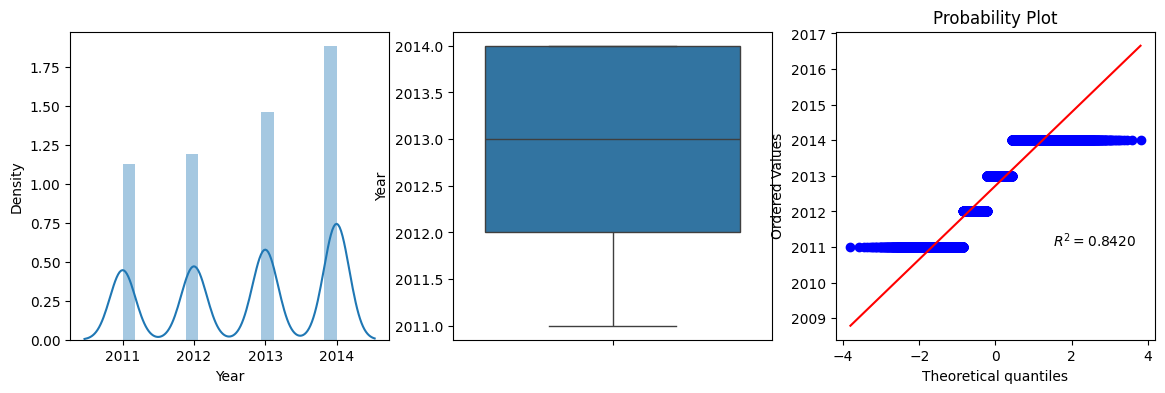

In [16]:
for col in data.select_dtypes(np.number).columns:
    print(f"Skewness of {col}:",data[col].skew())
    print(f"Kurtosis of {col}:",data[col].kurt())
    plt.subplots(nrows=1,ncols=2,figsize=(14,4))
    plt.subplot(1,3,1)
    sns.distplot(data[col])
    plt.subplot(1,3,2)
    sns.boxplot(data[col])
    plt.subplot(1,3,3)
    probplot(data[col],plot=plt,dist='norm',rvalue=True)
    plt.show()

Majority of the products are in Office Supplies category whereas the least number of products are in Technology category.

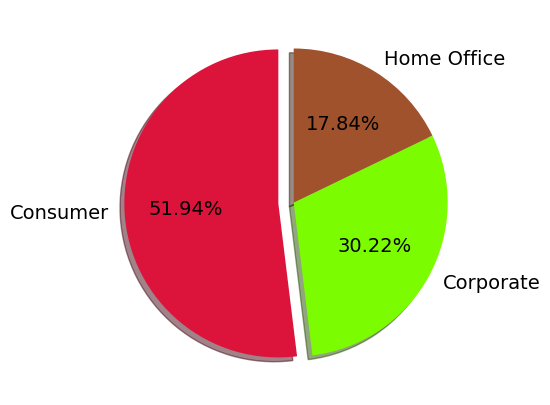

In [17]:
plt.figure(figsize=(10,5))
labels = data['Segment'].value_counts().keys()
values = data['Segment'].value_counts().values

plt.pie(values,labels=labels,autopct='%1.2f%%',shadow=True,explode=[0.1,0,0],startangle=90,textprops={'fontsize': 14},colors=['crimson','lawngreen','sienna'])
plt.show()

More than half of the entire population belongs to the Consumer segment.

In [18]:
data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

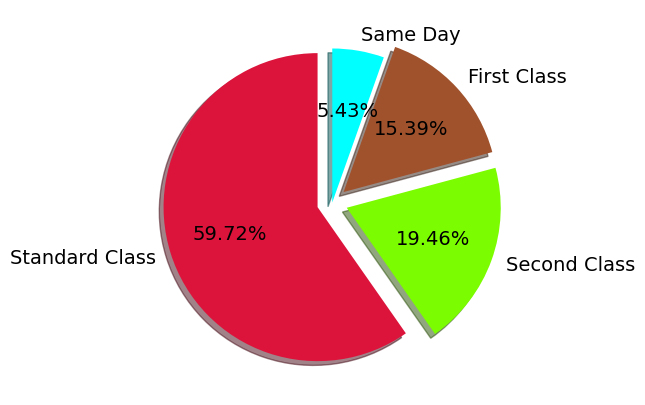

In [19]:
plt.figure(figsize=(10,5))
labels = data['Ship Mode'].value_counts().keys()
values = data['Ship Mode'].value_counts().values

plt.pie(values,labels=labels,autopct='%1.2f%%',shadow=True,explode=[0.1,0.1,0.1,0],startangle=90,textprops={'fontsize': 14},colors=['crimson','lawngreen','sienna','cyan'])
plt.show()

A significant number of orders were delivered via the Standard shipping mode whereas First Class and Second Class shipping modes were less frequently used.

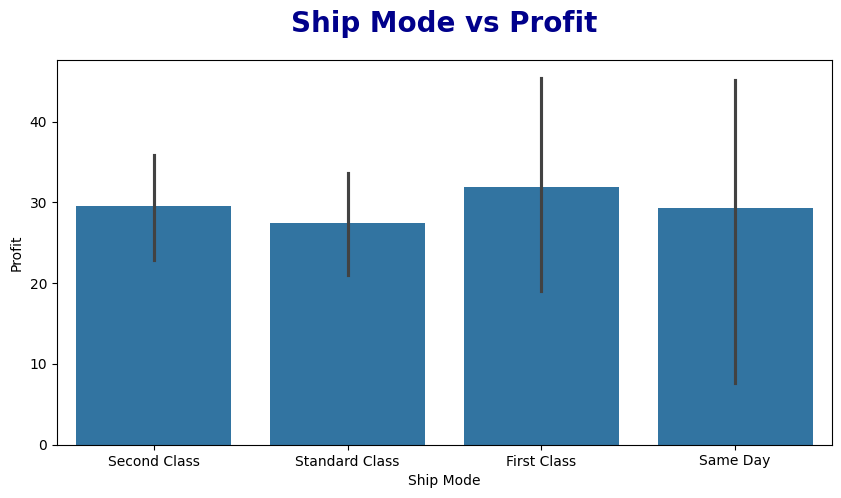

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x='Ship Mode',y='Profit',data=data)
plt.title('Ship Mode vs Profit',pad=20,fontsize=20,color='darkblue',fontweight='bold')
plt.show()

The First Class was the most profitable shipping mode while the Standard shipping mode was the least profitable.

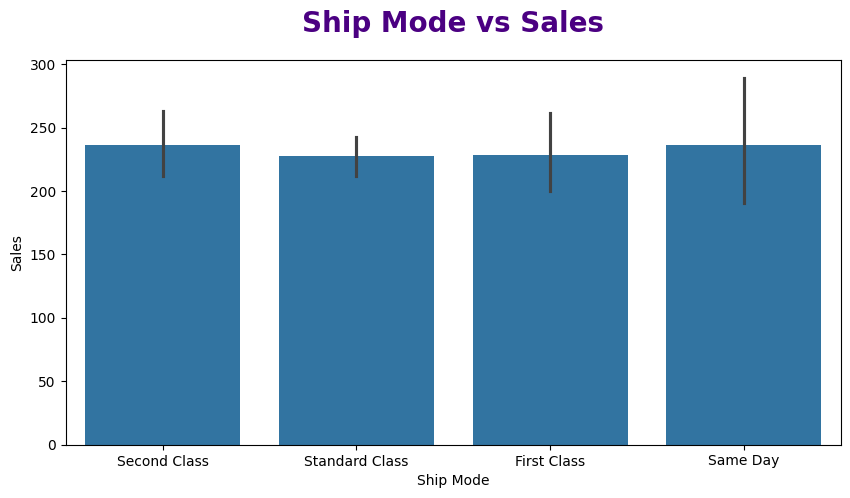

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x='Ship Mode',y='Sales',data=data)
plt.title('Ship Mode vs Sales',pad=20,fontsize=20,fontweight='bold',color='indigo')
plt.show()

The shipping modes that generated the highest sales are Second Class and Same Day whereas Standard Class and First Class generated the least sales.

C:\Users\manee\AppData\Local\Temp\ipykernel_18272\160123315.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ship Mode',y='Discount',data=data,palette='rocket')


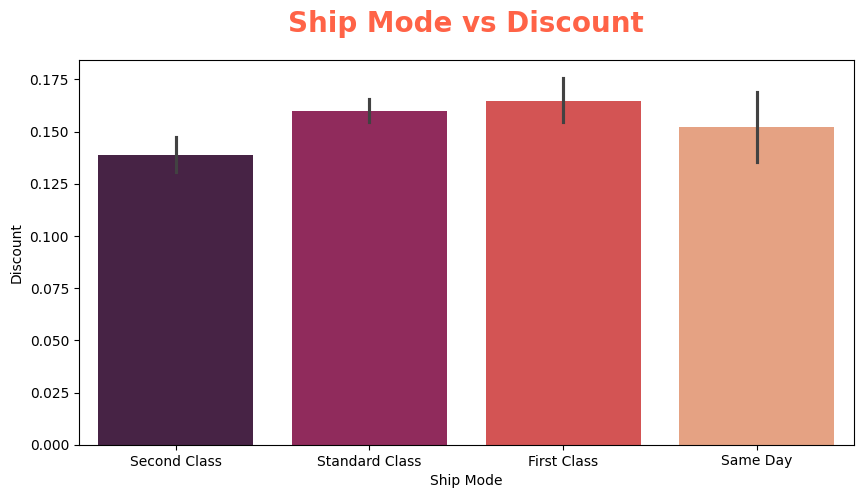

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x='Ship Mode',y='Discount',data=data,palette='rocket')
plt.title('Ship Mode vs Discount',pad=20,fontsize=20,fontweight='bold',color='tomato')
plt.show()

The maximum discount was offered on products that were delivered via the First Class shipping mode whereas the minimum discount was given on products that were shipped via the Second Class.

C:\Users\manee\AppData\Local\Temp\ipykernel_18272\1438894353.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ship Mode',y='Quantity',data=data,palette='coolwarm')


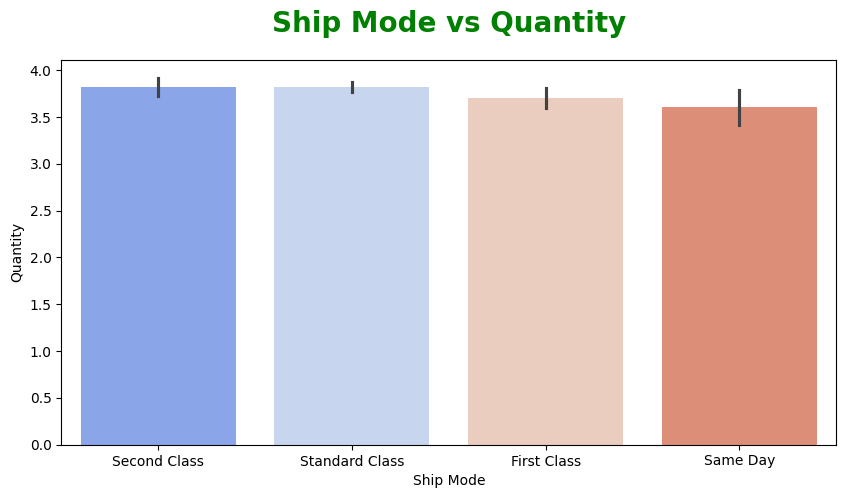

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(x='Ship Mode',y='Quantity',data=data,palette='coolwarm')
plt.title('Ship Mode vs Quantity',pad=20,fontsize=20,fontweight='bold',color='green')
plt.show()

The highest quantities of products were shipped via the Second Class and Standard Class shipping modes whereas the least quantities were shipped through the Same Day shipping mode.